In [1]:
from mmdet.apis import init_detector

from tools.annotations import get_files_annotations
from tools.constans import Categories, json_annotations
from tools.rectangles import get_mmdet_rects, get_coco_rects, draw_rectangles
from tools.rectangles import filter_rectangles


/home/nolok/anaconda3/envs/preannotation/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
config_file = './models/yolov3_mobilenetv2_320_300e_coco.py'

checkpoint_file = \
    './models/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'

model = init_detector(config_file, checkpoint_file, device="cpu")


load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


--- mmdet score ---
min	max	avg
0.002	0.925	0.082
--- < < --- > > ---


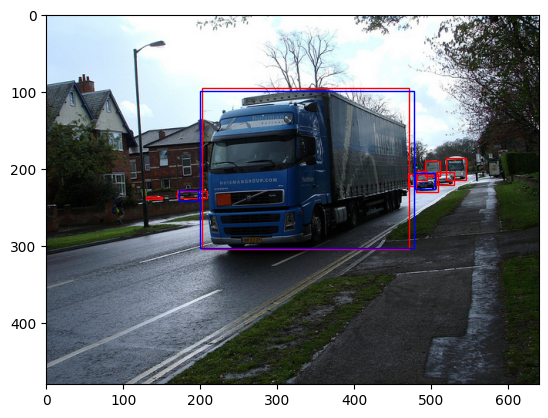

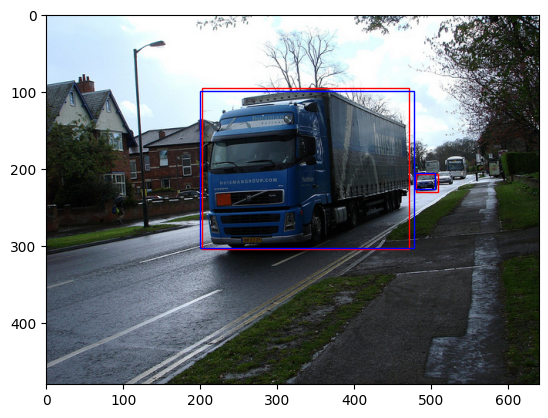

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.7871566627283548
AVG Jaccard Index (all): 0.08700940642474045


In [3]:
# EXAMPLE OF USING

files = get_files_annotations(json_annotations, Categories.VEHICLES.value)

file_path = "./coco/images/000000033109.jpg"
min_ji_index = 0.5

coco_rects = get_coco_rects(files[file_path.split("/")[-1]])
mmdet_rects = get_mmdet_rects(file_path, model)

draw_rectangles(file_path, coco_rects, mmdet_rects)

sorted_coco_rect, sorted_mmdet_rect, ji_avg1, ji_avg2 = filter_rectangles(
    coco_rects, mmdet_rects, min_ji_index
    )

draw_rectangles(file_path, sorted_coco_rect, sorted_mmdet_rect)
print("MIN Jaccard Index:", min_ji_index)
print("AVG Jaccard Index (ok):", ji_avg2)
print("AVG Jaccard Index (all):", ji_avg1)


--- mmdet score ---
min	max	avg
0.004	0.978	0.061
--- < < --- > > ---


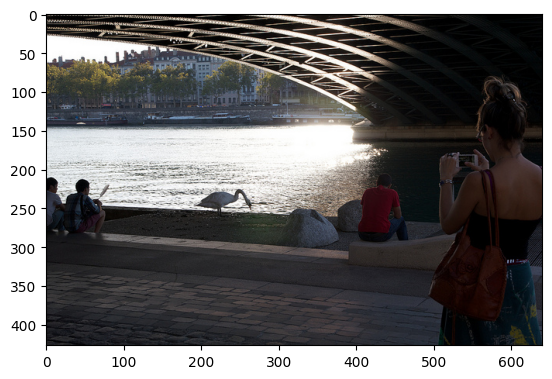

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0
AVG Jaccard Index (all): 0
--- mmdet score ---
min	max	avg
0.006	0.905	0.074
--- < < --- > > ---


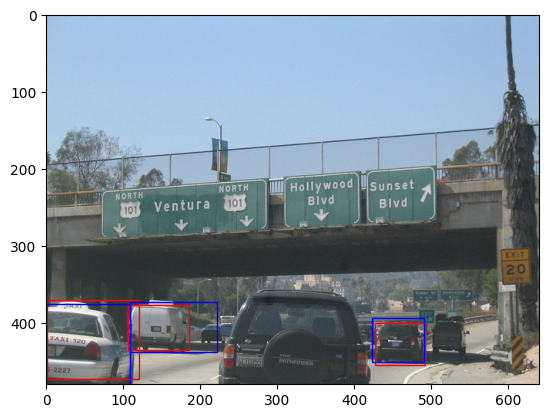

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.7304672547190444
AVG Jaccard Index (all): 0.09835837551311255
--- mmdet score ---
min	max	avg
0.006	0.999	0.082
--- < < --- > > ---


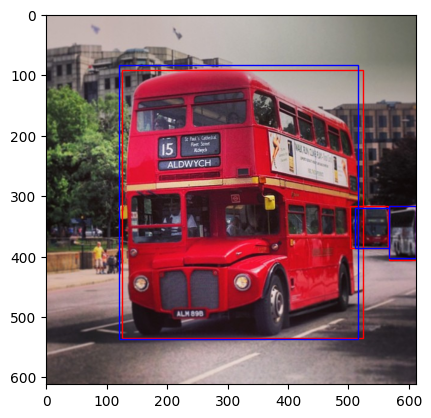

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.9087137172704695
AVG Jaccard Index (all): 0.3039974751185193
--- mmdet score ---
min	max	avg
0.009	0.293	0.038
--- < < --- > > ---


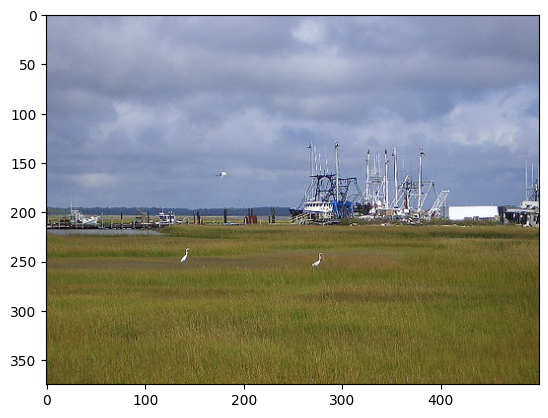

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0
AVG Jaccard Index (all): 0
--- mmdet score ---
min	max	avg
0.007	0.999	0.08
--- < < --- > > ---


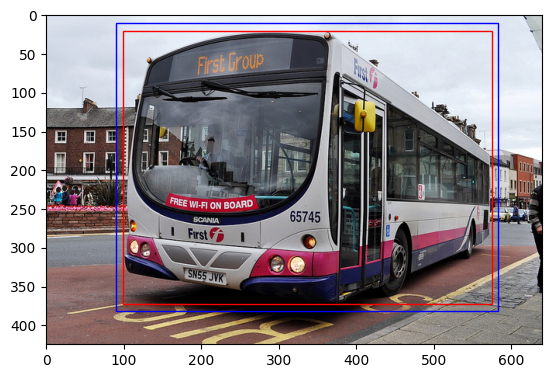

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.9179321981899065
AVG Jaccard Index (all): 0.1560266430949073
--- mmdet score ---
min	max	avg
0.001	0.966	0.047
--- < < --- > > ---


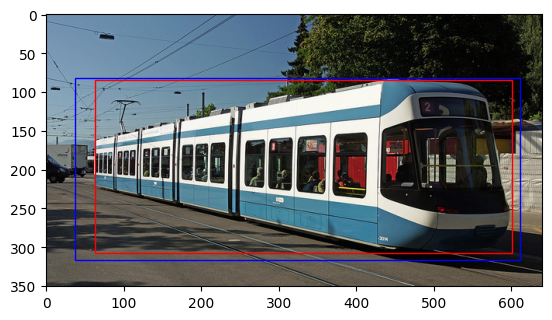

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.893221954197564
AVG Jaccard Index (all): 0.3000741339384279
--- mmdet score ---
min	max	avg
0.004	0.641	0.062
--- < < --- > > ---


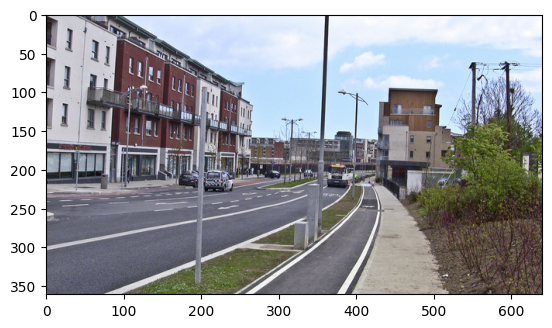

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0
AVG Jaccard Index (all): 0
--- mmdet score ---
min	max	avg
0.002	0.697	0.017
--- < < --- > > ---


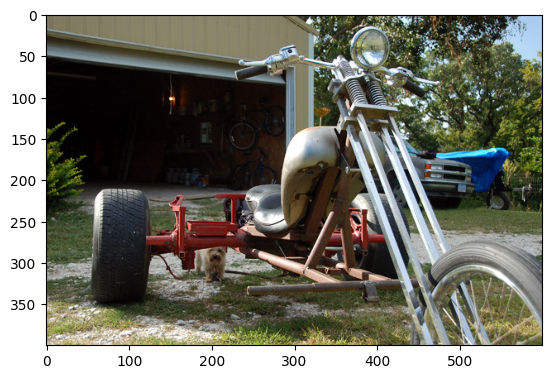

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0
AVG Jaccard Index (all): 0
--- mmdet score ---
min	max	avg
0.008	0.973	0.058
--- < < --- > > ---


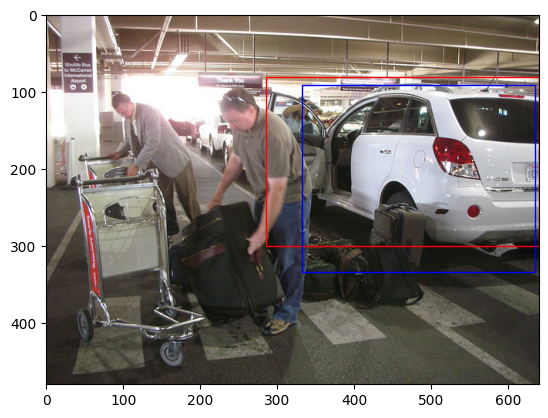

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.7163525712087961
AVG Jaccard Index (all): 0.1109883624382758
--- mmdet score ---
min	max	avg
0.001	0.947	0.042
--- < < --- > > ---


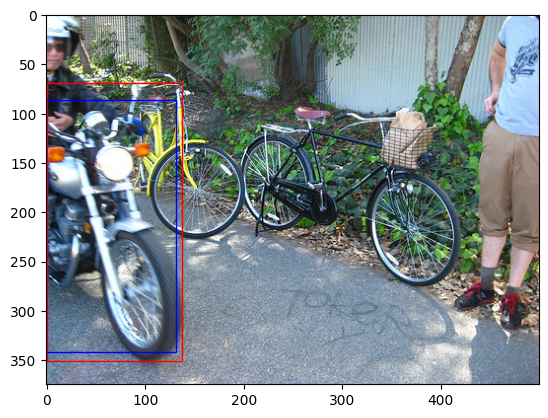

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.8623296477243507
AVG Jaccard Index (all): 0.16587656383735852
--- mmdet score ---
min	max	avg
0.011	0.962	0.102
--- < < --- > > ---


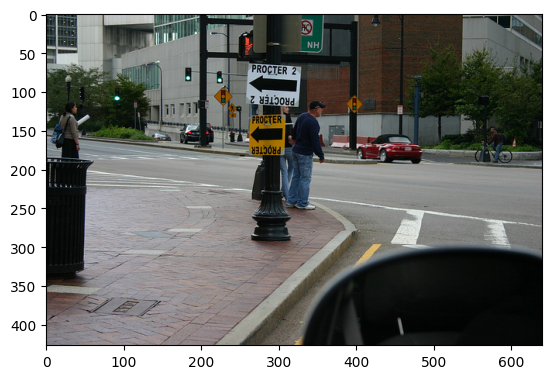

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0
AVG Jaccard Index (all): 0
--- mmdet score ---
min	max	avg
0.008	0.732	0.044
--- < < --- > > ---


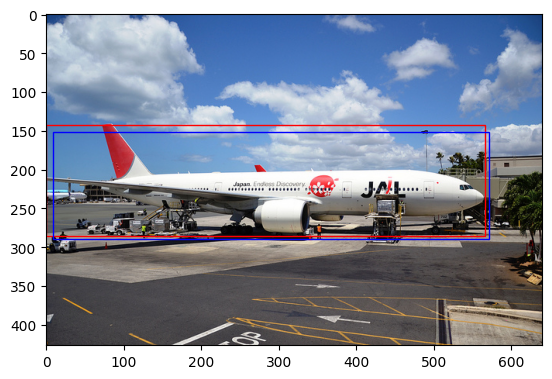

MIN Jaccard Index: 0.5
AVG Jaccard Index (ok): 0.8922078383532115
AVG Jaccard Index (all): 0.15320025673587423

AVG of all Jaccard Indexes: 0.49343543180527855


In [4]:
min_ji_index = 0.5
ji_avg_list = []

for i, file_name in enumerate(files):
    file_path = f"./coco/images/{file_name}"

    coco_rects = get_coco_rects(files[file_path.split("/")[-1]])
    mmdet_rects = get_mmdet_rects(file_path, model)

    sorted_coco_rect, sorted_mmdet_rect, ji_avg1, ji_avg2 = filter_rectangles(
        coco_rects, mmdet_rects, min_ji_index
        )

    if ji_avg2 >= 0:
        draw_rectangles(file_path, sorted_coco_rect, sorted_mmdet_rect)
        print("MIN Jaccard Index:", min_ji_index)
        print("AVG Jaccard Index (ok):", ji_avg2)
        print("AVG Jaccard Index (all):", ji_avg1)

        ji_avg_list.append(ji_avg2)

    if i > 10:
        break

print()
print("AVG of all Jaccard Indexes:", sum(ji_avg_list)/len(ji_avg_list))


In [5]:
min_ji_index = 0.5
ji_avg_list = []

for i, file_name in enumerate(files):
    file_path = f"./coco/images/{file_name}"

    coco_rects = get_coco_rects(files[file_path.split("/")[-1]])
    mmdet_rects = get_mmdet_rects(file_path, model, False)

    sorted_coco_rect, sorted_mmdet_rect, ji_avg1, ji_avg2 = filter_rectangles(
        coco_rects, mmdet_rects, min_ji_index
        )

    if ji_avg2 >= 0:
        ji_avg_list.append(ji_avg2)

print()
print("Files:", len(ji_avg_list))
print("AVG of all Jaccard Indexes:", sum(ji_avg_list)/len(ji_avg_list))



Files: 510
AVG of all Jaccard Indexes: 0.4123395228727746
